# 🌳 Trees, Bushes & Grass — Data Visualization Project

## 📑 Table of Contents
1. Introduction
2. Data Loading & Overview
3. Data Cleaning
4. Initial Exploration
5. Visualizing Green Balance
6. Interactive Visualizations
7. Creative RGB Mapping
8. Insights & Observations
9. Conclusion

### 🧠 Introduction
This data visualization project explores the **distribution of greenery** (trees, bushes, and grass) across 4-digit postcodes in the Netherlands.

### 🎯 Objective:
- Understand how green space is spread across different regions.
- Detect imbalances — areas with too much of one type and too little of another.
- Visualize each area's unique green composition creatively, especially through **color mapping**.

The dataset includes:
- Surface percentages of **trees**, **bushes**, and **grass**
- Per 4-digit postcode (PC4)
- Percentages may overlap (e.g., grass under trees), so totals may exceed 100%

We will use this data to answer questions like:
- Which areas have poor green balance?
- Can we creatively represent each postcode’s greenery using color?

In [2]:
# 📥 Data Loading & Overview

import pandas as pd

# Load the dataset
df = pd.read_csv('PC4_TreesBushesGrass.csv', delimiter=';')

# Check the structure and data types
df.info()

# View the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Postcode          4070 non-null   int64 
 1   PercentageTrees   4070 non-null   object
 2   PercentageBushes  4070 non-null   object
 3   PercentageGrass   4070 non-null   object
dtypes: int64(1), object(3)
memory usage: 127.3+ KB


,Postcode,PercentageTrees,PercentageBushes,PercentageGrass
0,1011,"20,29","5,89","17,21"
1,1012,"16,31","4,38","13,89"
2,1013,"21,12","7,54","30,54"
3,1014,"29,92","10,18","41,75"
4,1015,"21,36","7,43","17,37"


## 🧹 Data Cleaning

Before we perform any analysis or visualizations, it's essential to clean the dataset and ensure it is in the proper format.

### 🔍 Cleaning Steps:
1. **Standardize column names** to lowercase and underscores for consistency.
2. **Check for missing values** in any column.
3. **Check for duplicate postcodes**, which might indicate repeated rows or errors.

This step ensures that our data is tidy and


In [3]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicate postcodes
print("\nNumber of duplicate postcodes:")
print(df.duplicated(subset='postcode').sum())


Missing values per column:
postcode            0
percentagetrees     0
percentagebushes    0
percentagegrass     0
dtype: int64

Number of duplicate postcodes:
0


## 🔍 Initial Exploration

Now that the dataset is clean, let’s begin with basic data exploration.

### 🎯 Goals:
- Understand how trees, bushes, and grass percentages are distributed
- Check for unusually high or low green values
- Calculate total green coverage per postcode


In [4]:
# Describe each greenery category
print("📊 Descriptive Statistics:\n")
print(df[['percentagetrees', 'percentagebushes', 'percentagegrass']].describe())

# Calculate total green cover (note: may exceed 100 due to overlap)
df['total_green'] = df['percentagetrees'] + df['percentagebushes'] + df['percentagegrass']

# Describe total green
print("\n🌿 Total Green Coverage Stats:\n")
print(df['total_green'].describe())

# Show examples of postcodes with unusually high green cover
print("\n⚠️ Top 5 Postcodes with Highest Total Green:\n")
print(df.sort_values(by='total_green', ascending=False).head())


📊 Descriptive Statistics:

       percentagetrees percentagebushes percentagegrass
count             4070             4070            4070
unique            2503              711            2581
top              26,84             8,06           45,44
freq                 8               23               6

🌿 Total Green Coverage Stats:

count               4070
unique              4070
top       20,295,8917,21
freq                   1
Name: total_green, dtype: object

⚠️ Top 5 Postcodes with Highest Total Green:

      postcode percentagetrees percentagebushes percentagegrass    total_green
1416      4302            9,86             9,63           55,66  9,869,6355,66
462       1992            9,50             7,29           35,95  9,507,2935,95
726       2673            9,31             6,40           34,49  9,316,4034,49
1578      4652            9,16             6,99           54,84  9,166,9954,84
3472      8885            9,04             8,30           77,75  9,048,3077,75


In [5]:
# Convert percentage columns from string with commas to float
for col in ['percentagetrees', 'percentagebushes', 'percentagegrass']:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Recalculate total green after conversion
df['total_green'] = df['percentagetrees'] + df['percentagebushes'] + df['percentagegrass']

# Check the updated stats again
print("📊 Descriptive Statistics (Cleaned):\n")
print(df[['percentagetrees', 'percentagebushes', 'percentagegrass']].describe())

print("\n🌿 Total Green Coverage Stats (Cleaned):\n")
print(df['total_green'].describe())

print("\n⚠️ Top 5 Postcodes with Highest Total Green (Cleaned):\n")
print(df.sort_values(by='total_green', ascending=False).head())


📊 Descriptive Statistics (Cleaned):



       percentagetrees  percentagebushes  percentagegrass
count      4070.000000       4070.000000      4070.000000
mean         32.588693          8.692052        47.587354
std          11.483787          1.594413        10.970378
min           0.000000          1.990000        13.890000
25%          24.392500          7.770000        39.560000
50%          29.550000          8.460000        47.335000
75%          39.997500          9.290000        55.890000
max          70.450000         23.060000        91.490000

🌿 Total Green Coverage Stats (Cleaned):

count    4070.000000
mean       88.868098
std        13.494304
min        34.580000
25%        81.195000
50%        91.460000
75%        97.910000
max       140.810000
Name: total_green, dtype: float64

⚠️ Top 5 Postcodes with Highest Total Green (Cleaned):

      postcode  percentagetrees  percentagebushes  percentagegrass  \
3478      8896            63.01             10.03            67.77   
3480      8899            52.61     

## 🌿 Visualizing the Green Distribution

To understand how green types are distributed across postcodes, we start with basic histograms.

### 📊 Goals:
- See how trees, bushes, and grass percentages vary
- Spot which green type dominates most regions
- Identify outliers or skewed distributions

Histograms help us visually interpret spread and concentration.


C:\Users\HP1\AppData\Local\Temp\ipykernel_30084\3646245611.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


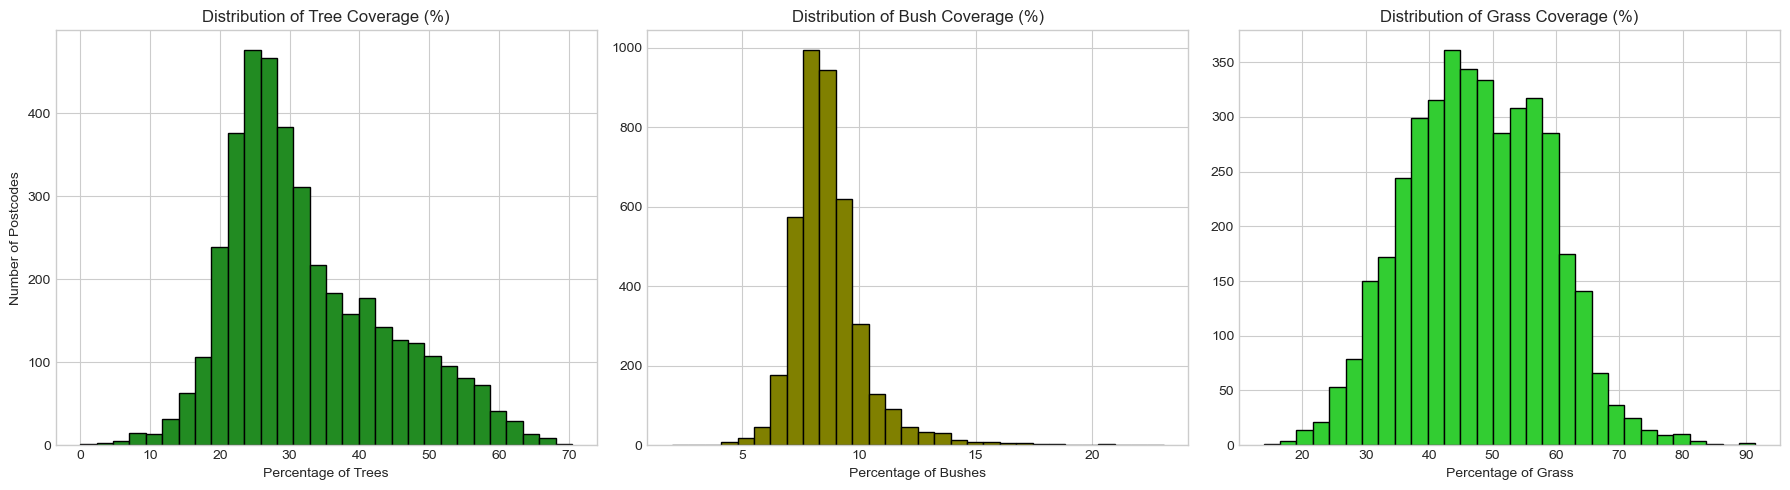

In [6]:
import matplotlib.pyplot as plt

# Set a consistent style
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(18, 5))

# Histogram for Trees
plt.subplot(1, 3, 1)
plt.hist(df['percentagetrees'], bins=30, color='forestgreen', edgecolor='black')
plt.title('Distribution of Tree Coverage (%)')
plt.xlabel('Percentage of Trees')
plt.ylabel('Number of Postcodes')

# Histogram for Bushes
plt.subplot(1, 3, 2)
plt.hist(df['percentagebushes'], bins=30, color='olive', edgecolor='black')
plt.title('Distribution of Bush Coverage (%)')
plt.xlabel('Percentage of Bushes')

# Histogram for Grass
plt.subplot(1, 3, 3)
plt.hist(df['percentagegrass'], bins=30, color='limegreen', edgecolor='black')
plt.title('Distribution of Grass Coverage (%)')
plt.xlabel('Percentage of Grass')

plt.tight_layout()
plt.show()


### 📊 Histogram Observations:

- **Tree Coverage**: 
  - Most postcodes have 20–40% tree coverage.
  - Very few have less than 10% or more than 60%.
  - The distribution is slightly right-skewed, showing some areas with much higher tree cover.

- **Bush Coverage**: 
  - Most values cluster tightly between **7–10%**.
  - Very little variation, indicating bushes are consistently limited in most areas.

- **Grass Coverage**:
  - Appears normally distributed.
  - Most postcodes fall between **35–60%**, peaking around 45–50%.
  - Some areas go up to 90%, suggesting very open grassy regions.

These plots confirm that **grass dominates the green surface**, while **bushes are least represented** across the Netherlands.


## 📏 Visualizing Green Imbalance

To measure how balanced the green distribution is across postcodes, we calculate the **standard deviation** of the three green surface types (trees, bushes, grass). 

### ✅ Interpretation:
- A **low standard deviation** indicates that all three percentages are similar → *balanced green*
- A **high standard deviation** suggests one type dominates → *unbalanced green*

We'll compute this metric and visualize its distribution.


📉 Green Imbalance Stats (Standard Deviation):

count    4070.000000
mean       21.372274
std         5.005214
min         5.790616
25%        18.233479
50%        21.597908
75%        24.610907
max        42.104240
Name: green_std, dtype: float64


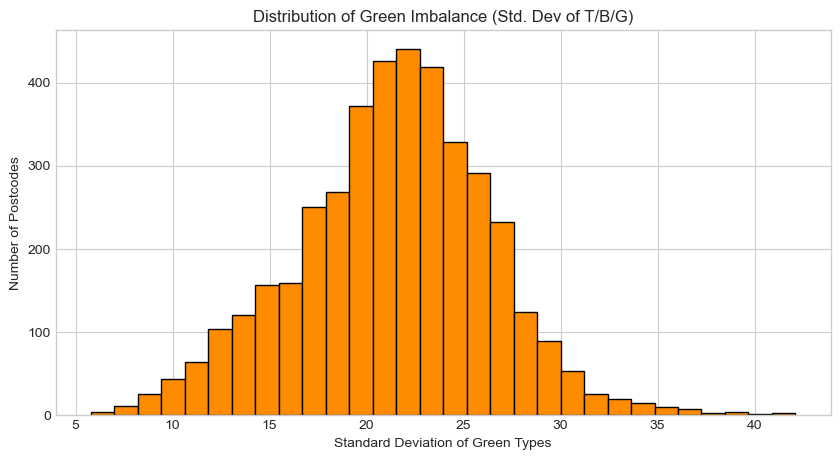

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate standard deviation across the three green types per postcode
df['green_std'] = df[['percentagetrees', 'percentagebushes', 'percentagegrass']].std(axis=1)

# Basic stats
print("📉 Green Imbalance Stats (Standard Deviation):\n")
print(df['green_std'].describe())

# Plot the distribution of green imbalance
plt.figure(figsize=(10, 5))
plt.hist(df['green_std'], bins=30, color='darkorange', edgecolor='black')
plt.title('Distribution of Green Imbalance (Std. Dev of T/B/G)')
plt.xlabel('Standard Deviation of Green Types')
plt.ylabel('Number of Postcodes')
plt.grid(True)
plt.show()


## Interactive Visualization

### 📊 Interpretation: Green Imbalance Distribution

- The **average imbalance (std dev)** across postcodes is around **21.4**, with a typical range between **18–25**.
- A **minimum imbalance** of ~5.8 suggests some postcodes have very balanced green coverage (trees, bushes, and grass are similar).
- The **maximum imbalance** exceeds 42, meaning a few areas are heavily dominated by one green type.
- The histogram shows a near-normal distribution, peaking around 22 — suggesting most regions have a moderate imbalance.

This metric (`green_std`) can help us identify and prioritize postcodes that might benefit from rebalancing green spaces.


### 📈 Interactive Visualization: Top 50 Tree-Dense Postcodes

To enhance the readability and exploration of green data, we use **Plotly** to create an interactive chart.

This bar chart shows the **top 50 postcodes with the highest percentage of tree coverage**. You can:
- Hover over each bar to see the exact percentage
- Zoom in/out or pan to focus on specific areas
- Click the legend to filter values
- Export the chart as an image for reports

This interactive approach allows for deeper insight into which areas are more tree-dense and how they compare with each other.


In [8]:
import plotly.express as px

# Sort top 50 greenest postcodes by tree percentage
top_trees = df.sort_values(by='percentagetrees', ascending=False).head(50)

# Convert postcode to string to force category behavior
top_trees['postcode'] = top_trees['postcode'].astype(str)

# Create an interactive bar chart
fig = px.bar(
    top_trees,
    x='postcode',
    y='percentagetrees',
    color='percentagetrees',
    color_continuous_scale='Greens',
    title='🌳 Top 50 Postcodes by Tree Coverage (%)',
    labels={'percentagetrees': 'Tree Coverage (%)', 'postcode': 'Postcode'},
    height=500
)

# Improve layout
fig.update_layout(
    xaxis_tickangle=-45,
    bargap=0.2,  # reduce gap between bars
    xaxis_type='category',  # treat postcodes as categories
    template='plotly_white'
)

fig.show()


### 🔍 Interpretation of the Interactive Chart

This interactive chart highlights the **top 50 Dutch postcodes with the highest percentage of tree coverage**.

- The postcodes are sorted in descending order, with the greenest areas on the left.
- The color intensity of each bar reflects the tree percentage — darker green indicates more tree coverage.
- Hovering over each bar reveals the exact postcode and its corresponding tree percentage.
- This visualization makes it easy to spot the most tree-rich areas in the Netherlands.

Such interactive charts allow users to **explore trends and spot outliers more intuitively** than static graphs.


### 📊 Interactive Visualization: Green Imbalance Across Postcodes

This chart shows the **top 50 postcodes with the highest green imbalance**, based on the standard deviation between tree, bush, and grass percentages.

- A **higher standard deviation** means more imbalance (e.g., only trees or only grass).
- A **lower value** indicates a more balanced mix of green types.

This helps identify ecologically skewed areas where one type of green space dominates.


In [9]:
import plotly.express as px

# Ensure 'green_std' exists (standard deviation across T/B/G)
df['green_std'] = df[['percentagetrees', 'percentagebushes', 'percentagegrass']].std(axis=1)

# Get top 50 most unbalanced postcodes
top_unbalanced = df.sort_values(by='green_std', ascending=False).head(50)
top_unbalanced['postcode'] = top_unbalanced['postcode'].astype(str)

# Create interactive bar chart
fig = px.bar(
    top_unbalanced,
    x='postcode',
    y='green_std',
    color='green_std',
    color_continuous_scale='Oranges',
    title='⚖️ Top 50 Postcodes by Green Imbalance (Std. Dev)',
    labels={'green_std': 'Green Imbalance (Std. Dev)', 'postcode': 'Postcode'},
    height=500
)

fig.update_layout(
    xaxis_tickangle=-45,
    bargap=0.2,
    xaxis_type='category',
    template='plotly_white'
)

fig.show()


### 🧠 Interpretation of the Green Imbalance Chart

This chart reveals the **top 50 postcodes with the most unbalanced green composition**.

- A higher standard deviation means one green type (trees, bushes, or grass) dominates while others are lacking.
- For example, some areas may have mostly grass and barely any trees or bushes.
- The **dark orange bars** show areas with extreme imbalance, which could be ecologically vulnerable or less biodiverse.

This insight can help urban planners or environmental agencies prioritize locations where a **more balanced green landscape** may be needed.

### 🌿 Interactive Visualization: Total Green Coverage by Postcode

This chart shows the **top 50 postcodes with the highest total green coverage** (trees + bushes + grass).

- Even though some values may exceed 100% (due to overlaps), it’s still a great indicator of how green an area is overall.
- Darker greens represent higher total percentages, suggesting richer green environments.

This helps highlight the greenest parts of the country — useful for ecological studies, planning, or even tourism insights.


In [10]:
import plotly.express as px

# Ensure 'total_green' column exists
df['total_green'] = df['percentagetrees'] + df['percentagebushes'] + df['percentagegrass']

# Sort and select top 50 greenest postcodes
top_total_green = df.sort_values(by='total_green', ascending=False).head(50)
top_total_green['postcode'] = top_total_green['postcode'].astype(str)

# Plot
fig = px.bar(
    top_total_green,
    x='postcode',
    y='total_green',
    color='total_green',
    color_continuous_scale='Greens',
    title='🌿 Top 50 Postcodes by Total Green Coverage (%)',
    labels={'total_green': 'Total Green (%)', 'postcode': 'Postcode'},
    height=500
)

fig.update_layout(
    xaxis_tickangle=-45,
    bargap=0.2,
    xaxis_type='category',
    template='plotly_white'
)

fig.show()


### 🌍 Interpretation of the Total Green Coverage Chart

This interactive chart highlights the **top 50 postcodes with the highest overall green surface percentage**, combining trees, bushes, and grass.

- Some values exceed 100% due to **overlapping greenery** (e.g., grass under trees), which is expected in the dataset.
- Darker green bars indicate postcodes with the richest vegetation.
- This gives a **broad view of environmental richness**, helping us identify the greenest parts of the Netherlands.

Such visuals are useful for understanding large-scale green distribution and can support discussions on sustainability, city planning, or even wellbeing.


## 🎨 RGB Color Mapping of Green Composition

To creatively visualize each postcode's green fingerprint, we map the three greenery types to RGB color channels:

- **Trees → Red**
- **Bushes → Green**
- **Grass → Blue**

By scaling each percentage to the RGB range (0–255), we assign a unique color to each postcode that reflects its green composition. 

### 🧠 Interpretation:
- A **reddish** color → high tree coverage
- A **greenish** color → high bush coverage
- A **bluish** or **purple tone** → lots of grass
- A **whiter/lighter** color → generally greener area with balance


In [11]:
# Normalize percentages to 0–255 scale and convert to integers
def scale_to_rgb(series):
    return ((series - series.min()) / (series.max() - series.min()) * 255).round().astype(int)

df['R'] = scale_to_rgb(df['percentagetrees'])     # Trees → Red
df['G'] = scale_to_rgb(df['percentagebushes'])    # Bushes → Green
df['B'] = scale_to_rgb(df['percentagegrass'])     # Grass → Blue

# Ensure columns are integers (in case of dtype errors)
df['R'] = df['R'].astype(int)
df['G'] = df['G'].astype(int)
df['B'] = df['B'].astype(int)

# Create RGB hex color safely by casting to int in the lambda
df['color'] = df.apply(lambda row: f'#{int(row.R):02x}{int(row.G):02x}{int(row.B):02x}', axis=1)

# Preview
df[['postcode', 'percentagetrees', 'percentagebushes', 'percentagegrass', 'R', 'G', 'B', 'color']].head()


,postcode,percentagetrees,percentagebushes,percentagegrass,R,G,B,color
0,1011,20.29,5.89,17.21,73,47,11,#492f0b
1,1012,16.31,4.38,13.89,59,29,0,#3b1d00
2,1013,21.12,7.54,30.54,76,67,55,#4c4337
3,1014,29.92,10.18,41.75,108,99,92,#6c635c
4,1015,21.36,7.43,17.37,77,66,11,#4d420b


## 🎨 Visualizing Green Fingerprints

Now that we’ve mapped trees, bushes, and grass to RGB values, each postcode has its own **color identity**. 

We visualize a sample of 20 postcodes as color swatches below to represent their green composition.

Each color block is labeled with the postcode, giving a quick, visual overview of green diversity across regions.


C:\Users\HP1\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 127752 (\N{RAINBOW}) missing from current font.



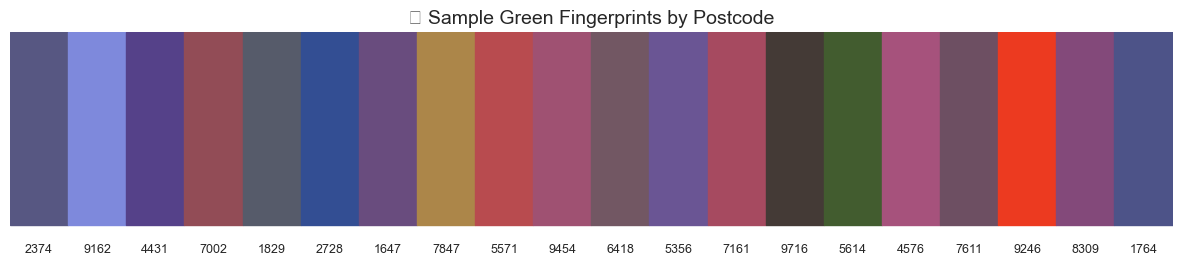

In [12]:
import matplotlib.pyplot as plt

# Sample 20 postcodes randomly for display
sample = df.sample(20, random_state=42).reset_index(drop=True)

# Plot color blocks
plt.figure(figsize=(15, 3))
for i, row in sample.iterrows():
    plt.gca().add_patch(plt.Rectangle((i, 0), 1, 1, color=row['color']))
    plt.text(i + 0.5, -0.1, str(row['postcode']), ha='center', va='top', fontsize=9)

plt.xlim(0, 20)
plt.ylim(-0.2, 1)
plt.axis('off')
plt.title('🌈 Sample Green Fingerprints by Postcode', fontsize=14)
plt.show()


## 🔍 Insights & Observations

### 🎨 RGB Mapping Reflections:
- Each postcode has a unique color based on its greenery balance.
- The visual differences help us quickly **spot diversity** in green composition.
- Some blocks are **reddish** (tree-heavy), others **blueish** (grass-heavy), while some are **neutral or balanced** (mix of RGB).

### 🌈 Usefulness:
- This technique can help urban planners identify regions where greenery is unbalanced.
- Lighter colors generally suggest **greener postcodes overall**, while darker shades may suggest imbalance or low greenery.
- Comparing these colors across maps or cities could reveal broader ecological patterns.

This visual approach turns raw numbers into an intuitive visual story.


## 🧩 Green Space Explorer Dashboard
Interactively explore green space composition by postcode.  
Use the dropdown to inspect Trees, Bushes, and Grass percentages for individual areas.

## 📊 Project Summary & Outcomes

This project explored the distribution and balance of green space — **trees**, **bushes**, and **grass** — across Dutch postcodes using a unique and creative data visualization approach.

### 🔍 What We Did:
- Cleaned and explored the data (4070 postcodes)  
- Calculated a **green imbalance metric** using standard deviation  
- Visualized green type distributions with histograms  
- Created **interactive visualizations** for tree coverage, green imbalance, and total green  
- Mapped each postcode’s green composition into an **RGB color code**  
- Displayed a color grid showing each postcode’s **green fingerprint**  


### 💡 Key Takeaways:
- Grass dominates most regions, while bushes are underrepresented  
- Some postcodes show strong imbalance (e.g., high grass or tree dominance)  
- RGB mapping allowed us to **see composition differences instantly**, offering a new way to think about environmental data  
- Interactive charts provided an intuitive way to explore green patterns and compare postcodes  

This project proves that **data visualization can be beautiful, functional, and insightful — all at once.**

##### ⚠️ *Tried multiple approaches to visualize the RGB data on an actual map of the Netherlands using libraries like `map_nl`, but encountered repeated memory and compatibility errors (both locally and in Colab), so this step was left out for now.*


## ✅ Conclusion

This visualization project helped uncover spatial patterns in green coverage across the Netherlands. While the data was initially simple, combining basic statistics with creative RGB encoding added depth. Further improvements like mapping these colors geographically or linking with population data could uncover even more valuable insights.
